In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',False)
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv('data_bersih.csv')

df = df.drop(
    ['garasi','jumlah_lantai','gym','Unnamed: 0','index'],
    axis = 1
)
df = df.drop_duplicates()

In [3]:
from feature_engine.outliers import OutlierTrimmer as OT

In [4]:
trimer =capper = OT(
    capping_method ='iqr', 
    tail = 'right', 
    fold = 3, 
    variables = ['harga']
)
trimer.fit(df)

OutlierTrimmer(capping_method='iqr', variables=['harga'])

In [5]:
df = trimer.transform(df)
df.info()

In [6]:
df_copy = df.copy()

In [7]:
num = [i for i in df_copy.columns if df_copy[i].dtypes in ['int','float']]
cat = [i for i in df_copy.columns if df_copy[i].dtypes in ['O','bool']]
df_copy[cat] = df_copy[cat].astype('O')

In [8]:
from feature_engine.encoding import OrdinalEncoder as OE

In [9]:
oe = OE(variables = [i for i in cat])
oe.fit(df_copy,df_copy['harga'])

OrdinalEncoder(variables=['kecamatan', 'kolam_renang', 'taman'])

In [10]:
df_copy = oe.transform(df_copy)

In [11]:
from sklearn.preprocessing import StandardScaler as ss

In [12]:
scale = ss()
scale.fit(df_copy)
df_copy = scale.transform(df_copy)

In [13]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [14]:
model = KMeans()
visualizer = KElbowVisualizer(
    model,
    k = (2,10),
    metric = 'calinski_harabasz',
    timing = False
)

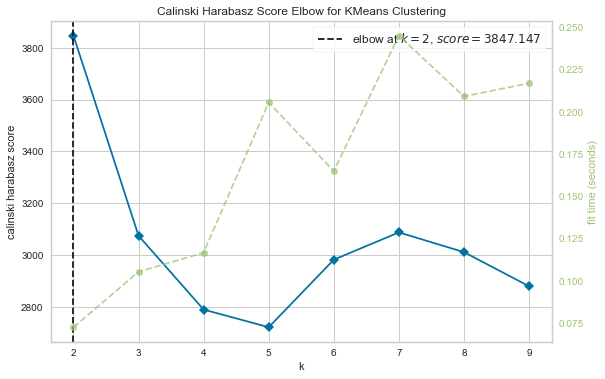

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [15]:
visualizer.fit(df_copy)
visualizer.show()

In [16]:
model = KMeans(n_clusters=2)
cluster = model.fit_predict(df_copy)

In [17]:
df_copy = pd.DataFrame(df_copy)

In [18]:
df_copy.columns = df.columns

In [19]:
df_copy['cluster'] = cluster

In [20]:
df['cluster'] = cluster

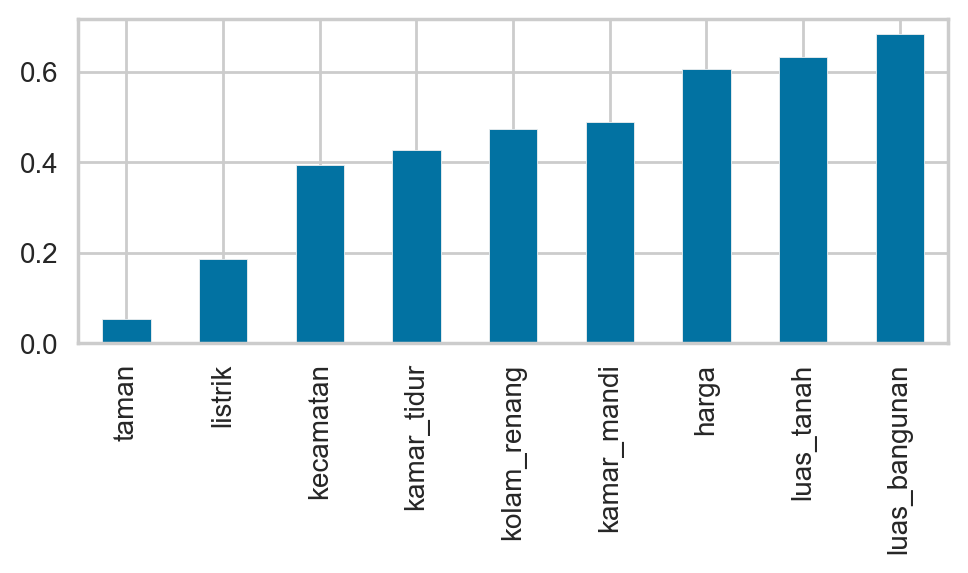

In [21]:
plt.figure(figsize=(5,2), dpi=200)
df_copy.corr()['cluster'][:-1].abs().sort_values().plot(kind='bar')
plt.show()

In [22]:
cluster_0 = df[df['cluster'] == 1]

In [23]:
cluster_0.describe()

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,listrik,cluster
count,2212.000000,2212.000000,2212.000000,2212.000000,2.212000e+03,2212.000000,2212.0
mean,6.236438,7.421790,678.581374,650.890597,2.653474e+10,9441.685805,1.0
std,3.446912,4.583586,399.635475,494.285456,2.643428e+10,10420.941984,0.0
min,1.000000,1.000000,50.000000,33.000000,1.050000e+09,130.000000,1.0
25%,4.000000,5.000000,450.000000,375.000000,1.100000e+10,2200.000000,1.0
50%,5.000000,6.000000,600.000000,530.500000,1.800000e+10,5500.000000,1.0
75%,7.000000,8.000000,800.000000,800.000000,3.300000e+10,11000.000000,1.0
max,29.000000,43.000000,6075.000000,7000.000000,3.750000e+11,76000.000000,1.0


In [24]:
cluster_0[cat].describe()

,kecamatan,kolam_renang,taman
count,2212,2212,2212
unique,41,2,2
top,Menteng,False,False
freq,327,1184,1635


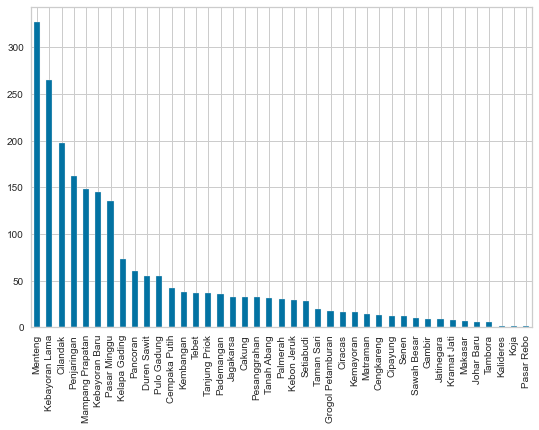

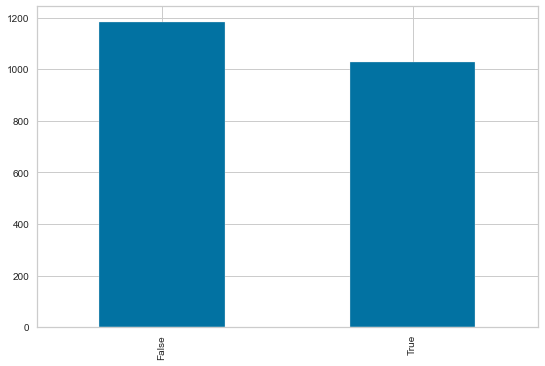

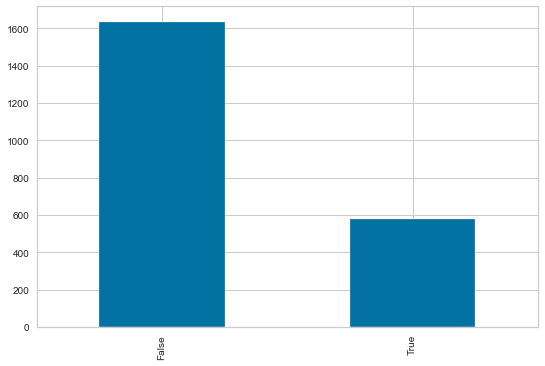

In [25]:
for i in cat:
    cluster_0[i].value_counts().plot.bar()
    plt.show()

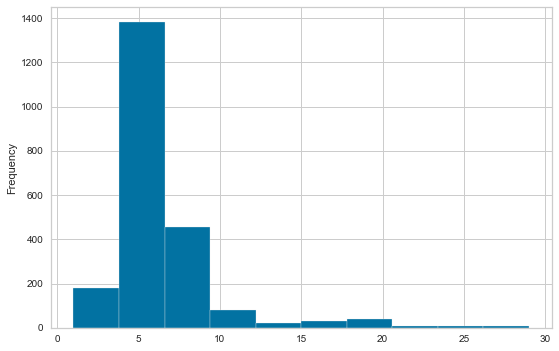

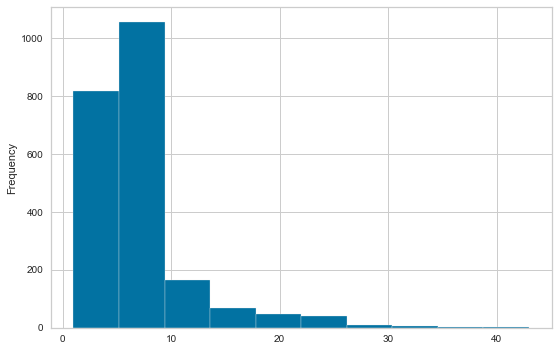

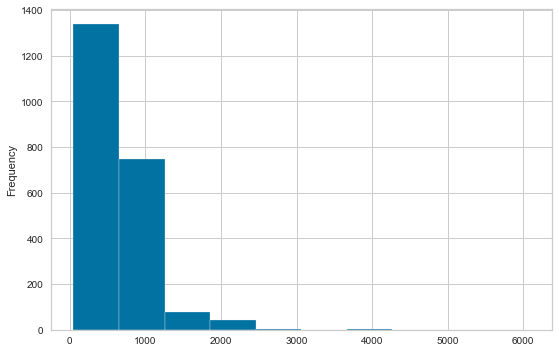

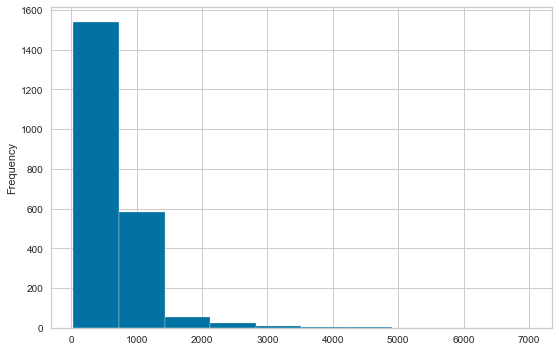

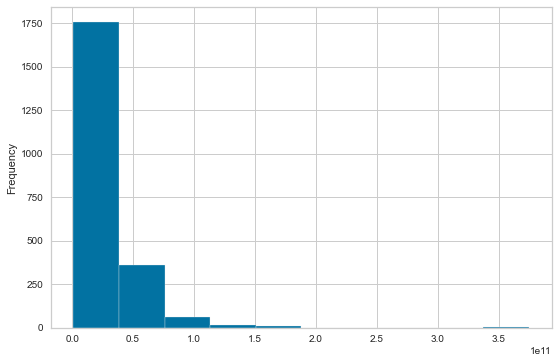

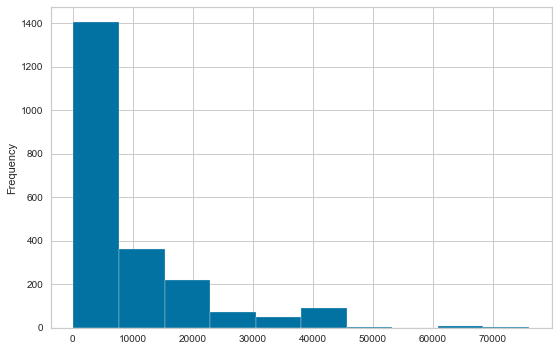

In [26]:
for i in num:
    cluster_0[i].plot.hist()
    plt.show()